In [2]:
from copy import deepcopy
from random import shuffle

import numpy as np
from scipy.stats import entropy

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.util import Distribution

from infomercial.discrete.value import entropy
from infomercial.discrete.value import surprisal
from infomercial.discrete.value import mutual_information
from infomercial.discrete.value import janson_shannon
from infomercial.discrete.value import kl_divergence
from infomercial.discrete.value import estimate_prob
from infomercial.discrete.value import delta_p
from infomercial.discrete.value import delta_H

from infomercial.local_gym import BanditFourArmedDeterministicFixed

In [8]:
times = np.linspace(0, 100, 100)
R_t = []
E_t = []
total_E = [0, ]
total_R = [0, ]

tau_E = 0.1
E_d = 1
r = 1

for i in times:
    R_t.append(r)
    total_R.append(r + total_R[-1])
    
    E_d -= tau_E * E_d
    E_t.append(E_d)
    total_E.append(E_d + total_E[-1])

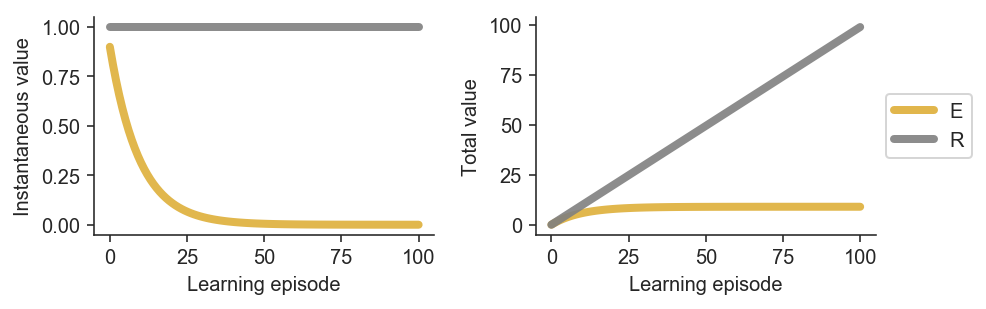

In [11]:
fig = plt.figure(figsize=(7, 2))
grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.plot(times, E_t, color="goldenrod", alpha=0.8, linewidth=4, label="E")
plt.plot(times, R_t, color="grey",  alpha=0.9, linewidth=4, label="R")
plt.ylabel("Instantaneous value")
plt.xlabel("Learning episode")

plt.subplot(grid[0, 1])
plt.plot(times, total_E[:-1], color="goldenrod", alpha=0.8, linewidth=4, label="E")
plt.plot(times, total_R[:-1], color="grey",  alpha=0.9, linewidth=4, label="R")
plt.ylabel("Total value")
plt.xlabel("Learning episode")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

plt.savefig("figures/simple_E_R_timecourse.pdf",  bbox_inches='tight')
plt.savefig("figures/simple_E_R_timecourse.png",  bbox_inches='tight')
plt.savefig("figures/simple_E_R_timecourse.eps",  bbox_inches='tight')